In [1]:
import json
import ast

with open("../ElaTBoT-DFT/ft_result/prompt1/test_result_repeat_in_bohrium_v100/generated_predictions.jsonl", 'r') as file:
    data = [json.loads(line) for line in file]

# Load test data
with open('../reproduce/data/prompt_type_1/ec_short_test_dataset.json', 'r') as file:
    test_data = json.load(file)

In [2]:
print(len(data))
print(len(test_data))

522
522


In [3]:
import re

def get_pure_text(text):
    return re.match(r"\[\[.*?\]\]", text, re.DOTALL).group(0)


In [4]:
real_val = []
predict_val = []
abnormal = []
for i in range(len(data)):
    try:
        r = ast.literal_eval(test_data[i]['output'])
        p = eval(get_pure_text(data[i]['predict']))
    except:
        print(i)
        abnormal.append([test_data[i]['output'],data[i]['predict']])
        continue
    real_val.append(r)
    predict_val.append(p)

In [5]:
print(len(real_val))
print(len(predict_val))
print(abnormal)

522
522
[]


In [6]:
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np
predict_mean = []
real_mean = []
for i in range(len(real_val)):
    try:
        predict_mean.append(np.mean(predict_val[i]))
        real_mean.append(np.mean(real_val[i]))
    except:
        print(predict_val[i])
        print(real_val[i])
        continue
print(len(predict_mean), len(real_mean))
mae_cij = mean_absolute_error(real_mean, predict_mean)
r2_cij = r2_score(real_mean, predict_mean)
print(mae_cij)
print(r2_cij)

522 522
2.791932737335036
0.9473497102958752


In [7]:
import seaborn as sns
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import scienceplots
plt.style.use('ieee')
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['font.weight'] = 'bold'
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelweight'] = 'bold'

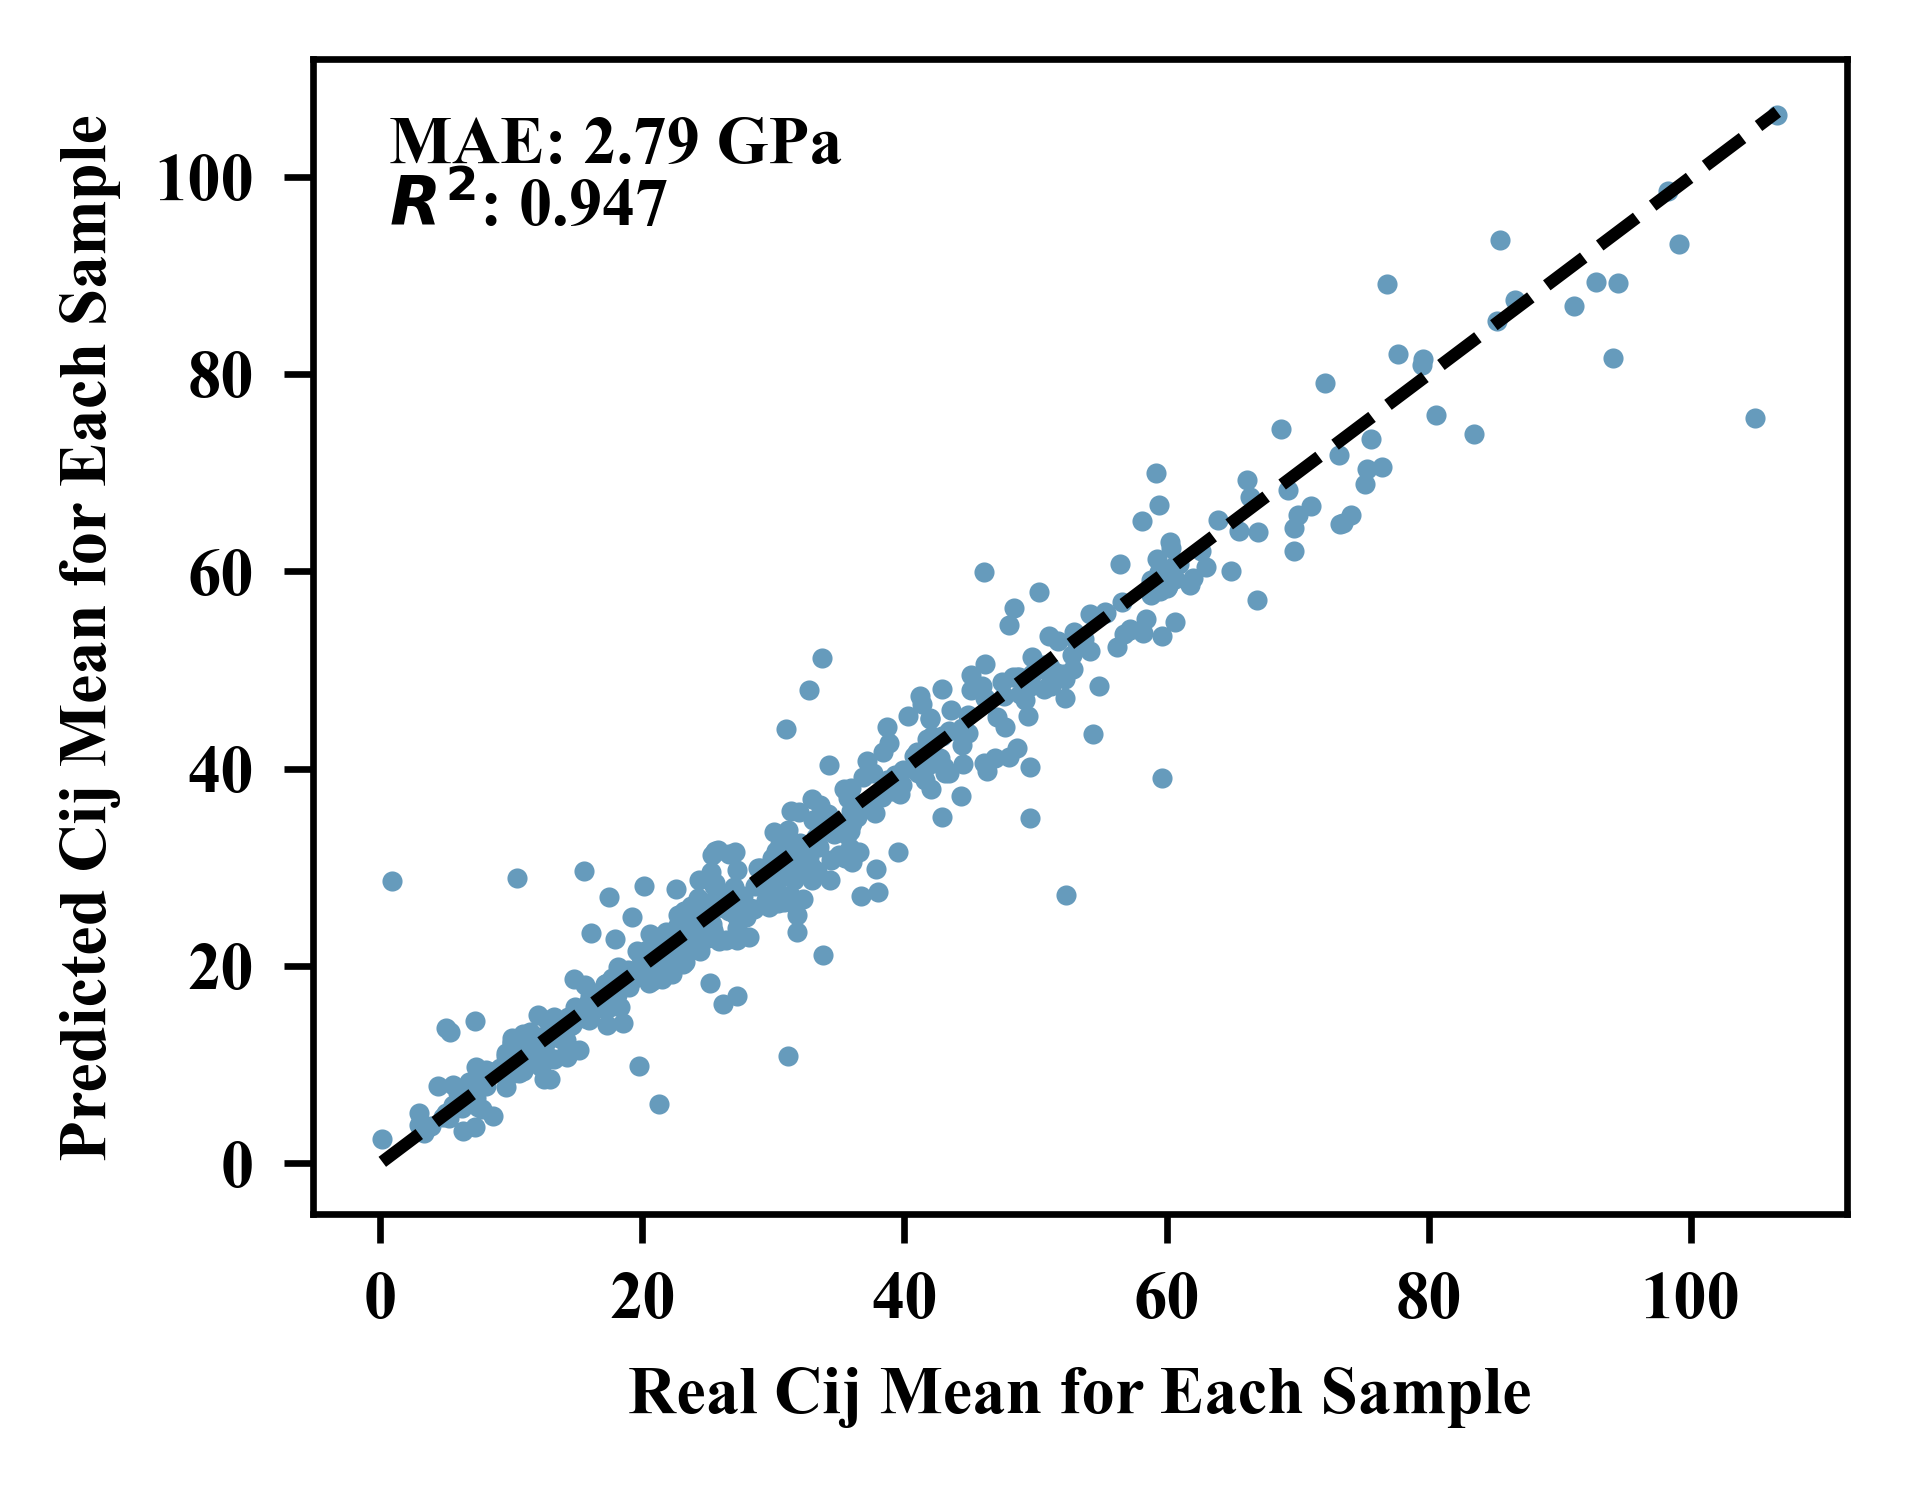

In [8]:
#prompt 1
import matplotlib.pyplot as plt
plt.scatter(real_mean, predict_mean, color='#669bbc', s=2)  # Adjusted point size
plt.xlabel('Real Cij Mean for Each Sample')
plt.ylabel('Predicted Cij Mean for Each Sample')
plt.plot([min(real_mean), max(real_mean)], [min(real_mean), max(real_mean)], 'k--')  # y=x dashed line in black
plt.text(0.05, 0.95, 'MAE: 2.79 GPa', transform=plt.gca().transAxes, fontsize=8, verticalalignment='top')
plt.text(0.05, 0.90, r'$R^2$: 0.947', transform=plt.gca().transAxes, fontsize=8, verticalalignment='top')
plt.savefig("prompt1_scatter.pdf", dpi=600, bbox_inches='tight')
plt.show()

In [ ]:
# # prompt 2
# import matplotlib.pyplot as plt
# plt.scatter(real_mean, predict_mean, color='#0077b6', s=2)  # Adjusted point size
# plt.xlabel('Real Cij Mean for Each Sample')
# plt.ylabel('Predicted Cij Mean for Each Sample')
# plt.plot([min(real_mean), max(real_mean)], [min(real_mean), max(real_mean)], 'k--')  # y=x dashed line in black
# plt.text(0.05, 0.95, 'MAE: 2.45 GPa', transform=plt.gca().transAxes, fontsize=8, verticalalignment='top')
# plt.text(0.05, 0.90, r'$R^2$: 0.957', transform=plt.gca().transAxes, fontsize=8, verticalalignment='top')
# plt.savefig("prompt2_scatter.pdf", dpi=600, bbox_inches='tight')
# plt.show()

In [ ]:
# # prompt 3
# import matplotlib.pyplot as plt
# plt.scatter(real_mean, predict_mean, color='#03045e', s=2)  # Adjusted point size
# plt.xlabel('Real Cij Mean for Each Sample')
# plt.ylabel('Predicted Cij Mean for Each Sample')
# plt.plot([min(real_mean), max(real_mean)], [min(real_mean), max(real_mean)], 'k--')  # y=x dashed line in black
# plt.text(0.05, 0.95, 'MAE: 2.67 GPa', transform=plt.gca().transAxes, fontsize=8, verticalalignment='top')
# plt.text(0.05, 0.90, r'$R^2$: 0.956', transform=plt.gca().transAxes, fontsize=8, verticalalignment='top')
# plt.savefig("prompt3_scatter.pdf", dpi=600, bbox_inches='tight')
# plt.show()

In [ ]:
# # prompt 4
# import matplotlib.pyplot as plt
# plt.scatter(real_mean, predict_mean, color='#c1121f', s=2)  # Adjusted point size
# plt.xlabel('Real Cij Mean for Each Sample')
# plt.ylabel('Predicted Cij Mean for Each Sample')
# plt.plot([min(real_mean), max(real_mean)], [min(real_mean), max(real_mean)], 'k--')  # y=x dashed line in black
# plt.text(0.05, 0.95, 'MAE: 2.32 GPa', transform=plt.gca().transAxes, fontsize=8, verticalalignment='top')
# plt.text(0.05, 0.90, r'$R^2$: 0.965', transform=plt.gca().transAxes, fontsize=8, verticalalignment='top')
# plt.savefig("prompt4_scatter.pdf", dpi=600, bbox_inches='tight')
# plt.show()

In [ ]:
# # darwin_desc
# import matplotlib.pyplot as plt
# plt.scatter(real_mean, predict_mean, color='#c9ada7', s=2)  # Adjusted point size
# plt.xlabel('Real Cij Mean for Each Sample')
# plt.ylabel('Predicted Cij Mean for Each Sample')
# plt.plot([min(real_mean), max(real_mean)], [min(real_mean), max(real_mean)], 'k--')  # y=x dashed line in black
# plt.text(0.05, 0.95, 'MAE: 3.47 GPa', transform=plt.gca().transAxes, fontsize=8, verticalalignment='top')
# plt.text(0.05, 0.90, r'$R^2$: 0.915', transform=plt.gca().transAxes, fontsize=8, verticalalignment='top')
# plt.savefig("darwin_desc_scatter.pdf", dpi=600, bbox_inches='tight')
# plt.show()

In [9]:
## Calculate bulk modulus  according to the stiffness matrix
from pymatgen.analysis.elasticity import ElasticTensor
import numpy as np

def calculate_properties(stiffness_matrix: list) -> (float, float, float):
    elastic_constant = np.asarray(stiffness_matrix)
    elastic_tensor = ElasticTensor.from_voigt(elastic_constant)
    bulk_modulus = round(elastic_tensor.k_voigt, 3)
    return bulk_modulus

In [10]:
real_bulk = []
predict_bulk = []

for i in range(len(real_val)):
    try:
        t1 = calculate_properties(real_val[i])
        t2 = calculate_properties(predict_val[i])
    except:
        print(i)
        continue
    real_bulk.append(t1)
    predict_bulk.append(t2)

In [11]:
print(len(real_bulk), len(predict_bulk))

522 522


In [12]:
print(real_bulk)
print(np.mean(real_bulk))
print(predict_bulk)

[255.222, 177.222, 195.444, 63.333, 116.0, 34.889, 64.889, 274.889, 45.0, 40.889, 90.444, 286.111, 116.556, 336.889, 228.667, 230.667, 134.333, 90.333, 76.111, 168.0, 138.0, 251.667, 49.667, 80.333, 182.333, 112.889, 163.333, 199.0, 192.333, 149.444, 37.333, 146.889, 136.667, 168.889, 135.556, 159.222, 147.667, 215.667, 93.556, 33.667, 119.0, 86.667, 132.556, 15.0, 24.0, 129.0, 69.222, 72.889, 34.222, 113.889, 93.333, 97.111, 171.667, 253.444, 161.111, 110.0, 133.889, 17.667, 24.889, 105.333, 84.778, 136.444, 73.444, 84.889, 137.333, 169.667, 23.333, 66.667, 70.556, 63.889, 204.0, 64.889, 308.0, 75.333, 194.333, 53.0, 95.222, 41.778, 109.333, 168.0, 218.778, 28.222, 195.444, 209.0, 58.889, 119.667, 161.111, 118.667, 95.0, 79.333, 123.111, 87.0, 236.667, 77.667, 67.0, 65.444, 53.222, 39.222, 79.111, 232.0, 108.667, 61.889, 135.556, 68.889, 189.889, 42.556, 35.333, 257.222, 188.667, 94.889, 132.889, 98.556, 69.333, 68.667, 196.333, 71.333, 26.778, 36.0, 115.333, 109.0, 97.667, 35.0, 54.3

In [13]:
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np

mae = mean_absolute_error(real_bulk, predict_bulk)
r2 = r2_score(real_bulk, predict_bulk)
print("Mean Absolute Error: ", mae)
print("R2 Score: ", r2)

Mean Absolute Error:  9.044925287356321
R2 Score:  0.9469072426980139


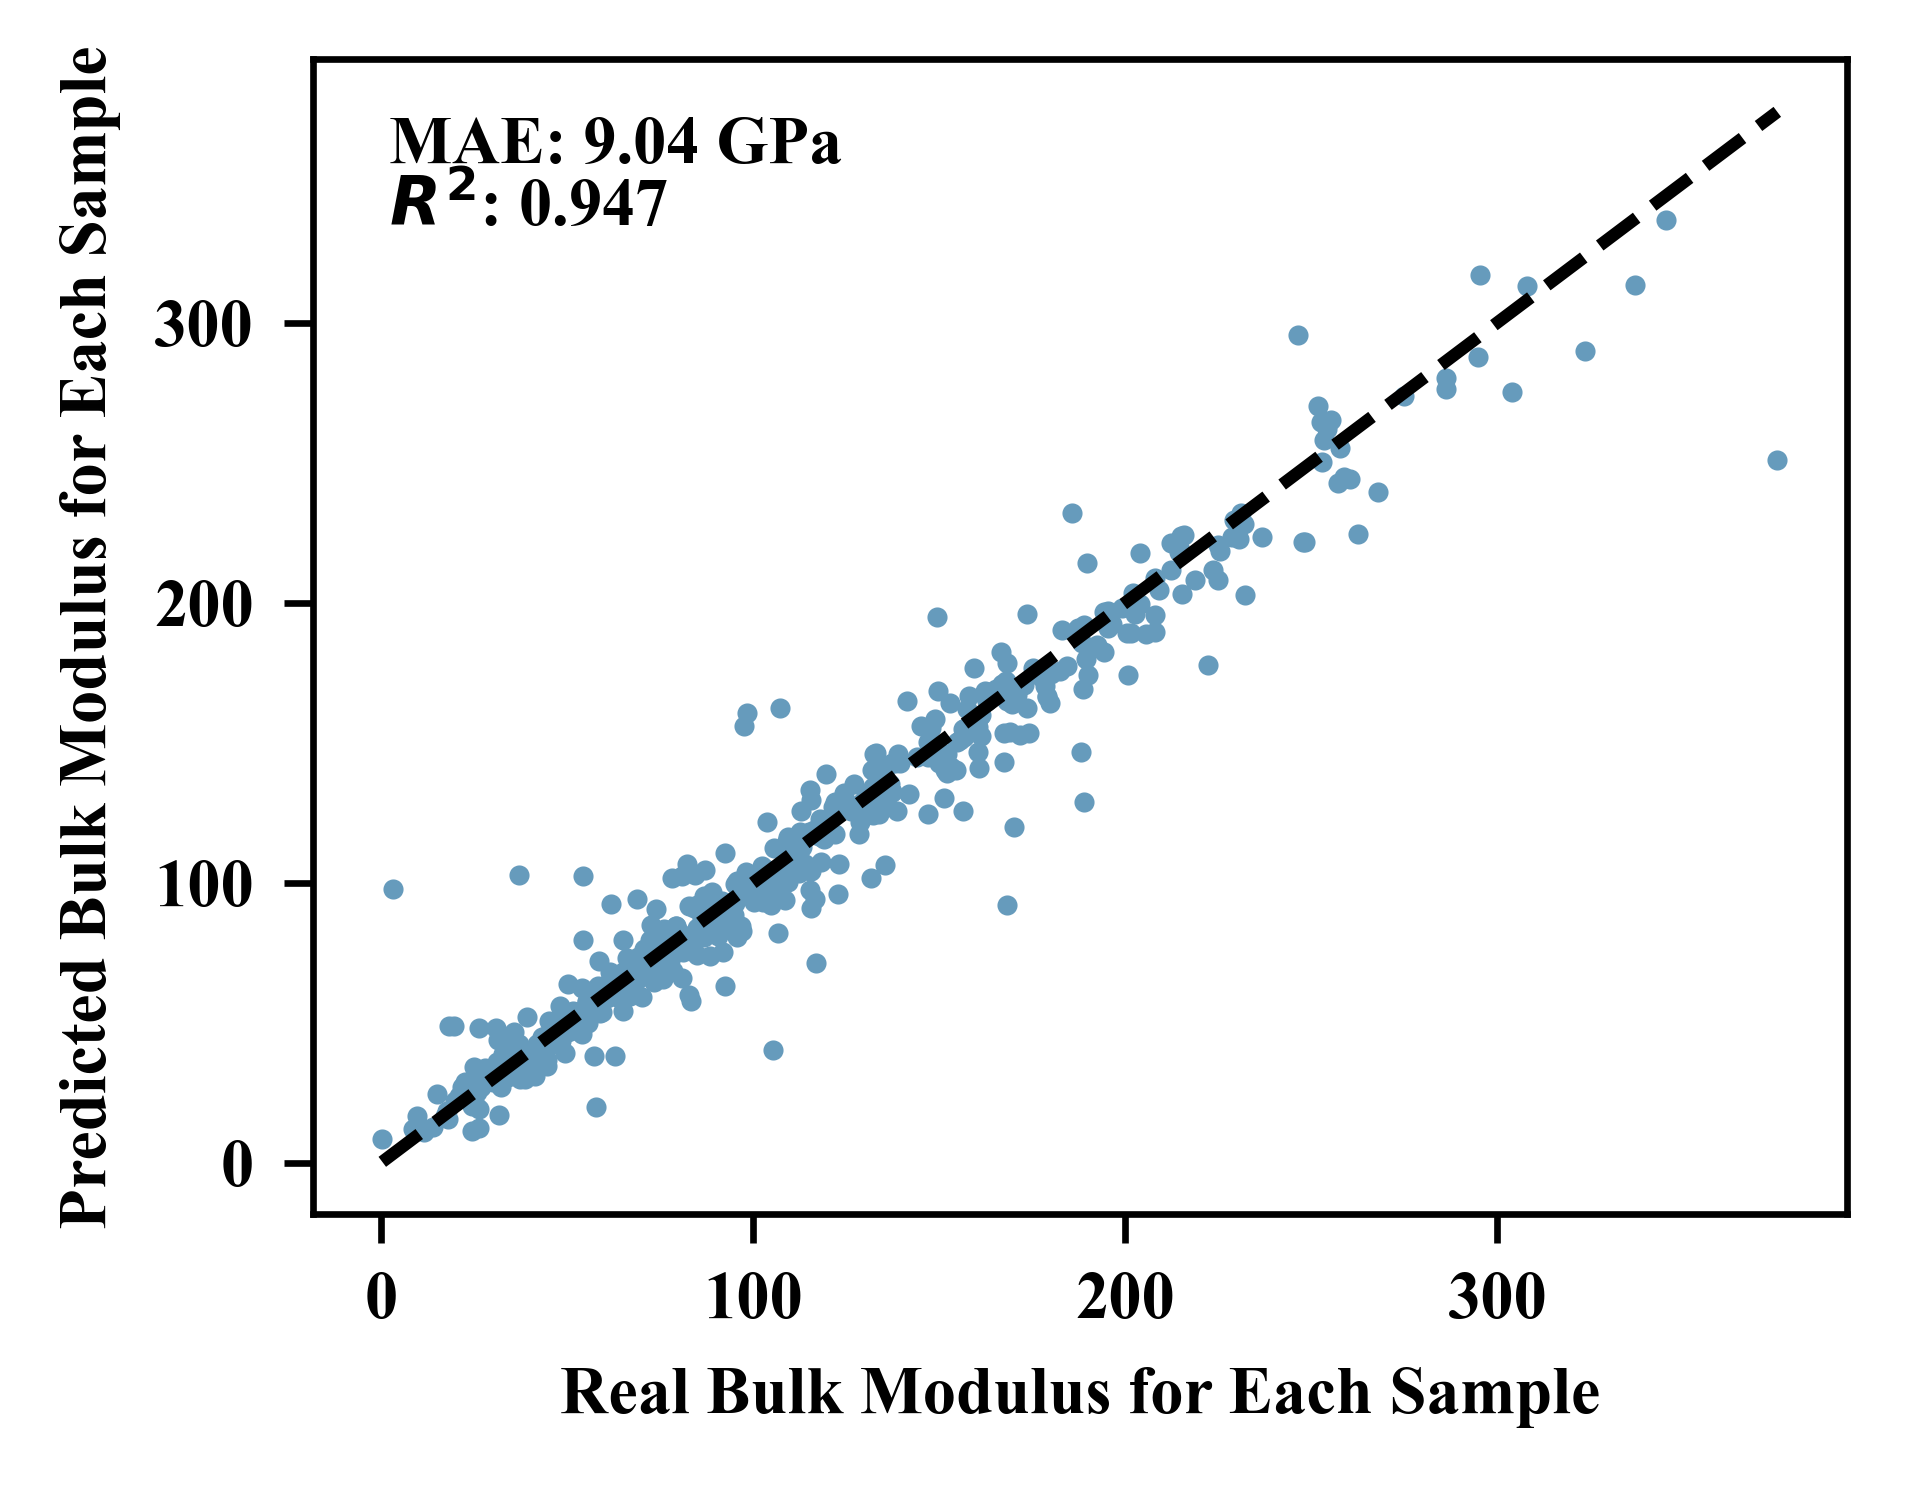

In [14]:
# prompt 1
import matplotlib.pyplot as plt
plt.scatter(real_bulk, predict_bulk, color='#669bbc', s=2)  # Adjusted point size
plt.xlabel('Real Bulk Modulus for Each Sample')
plt.ylabel('Predicted Bulk Modulus for Each Sample')
plt.plot([min(real_bulk), max(real_bulk)], [min(real_bulk), max(real_bulk)], 'k--')  # y=x dashed line in black
plt.text(0.05, 0.95, 'MAE: 9.04 GPa', transform=plt.gca().transAxes, fontsize=8, verticalalignment='top')
plt.text(0.05, 0.90, r'$R^2$: 0.947', transform=plt.gca().transAxes, fontsize=8, verticalalignment='top')
plt.savefig("prompt1_bulk_scatter.pdf", dpi=600, bbox_inches='tight')
plt.show()

In [ ]:
# # prompt 2
# import matplotlib.pyplot as plt
# plt.scatter(real_bulk, predict_bulk, color='#0077b6', s=2)  # Adjusted point size
# plt.xlabel('Real Bulk Modulus for Each Sample')
# plt.ylabel('Predicted Bulk Modulus for Each Sample')
# plt.plot([min(real_bulk), max(real_bulk)], [min(real_bulk), max(real_bulk)], 'k--')  # y=x dashed line in black
# plt.text(0.05, 0.95, 'MAE: 8.12 GPa', transform=plt.gca().transAxes, fontsize=8, verticalalignment='top')
# plt.text(0.05, 0.90, r'$R^2$: 0.955', transform=plt.gca().transAxes, fontsize=8, verticalalignment='top')
# plt.savefig("prompt2_bulk_scatter.pdf", dpi=600, bbox_inches='tight')
# plt.show()

In [ ]:
# # prompt 3
# import matplotlib.pyplot as plt
# plt.scatter(real_bulk, predict_bulk, color='#03045e', s=2)  # Adjusted point size
# plt.xlabel('Real Bulk Modulus for Each Sample')
# plt.ylabel('Predicted Bulk Modulus for Each Sample')
# plt.plot([min(real_bulk), max(real_bulk)], [min(real_bulk), max(real_bulk)], 'k--')  # y=x dashed line in black
# plt.text(0.05, 0.95, 'MAE: 8.60 GPa', transform=plt.gca().transAxes, fontsize=8, verticalalignment='top')
# plt.text(0.05, 0.90, r'$R^2$: 0.954', transform=plt.gca().transAxes, fontsize=8, verticalalignment='top')
# plt.savefig("prompt3_bulk_scatter.pdf", dpi=600, bbox_inches='tight')
# plt.show()

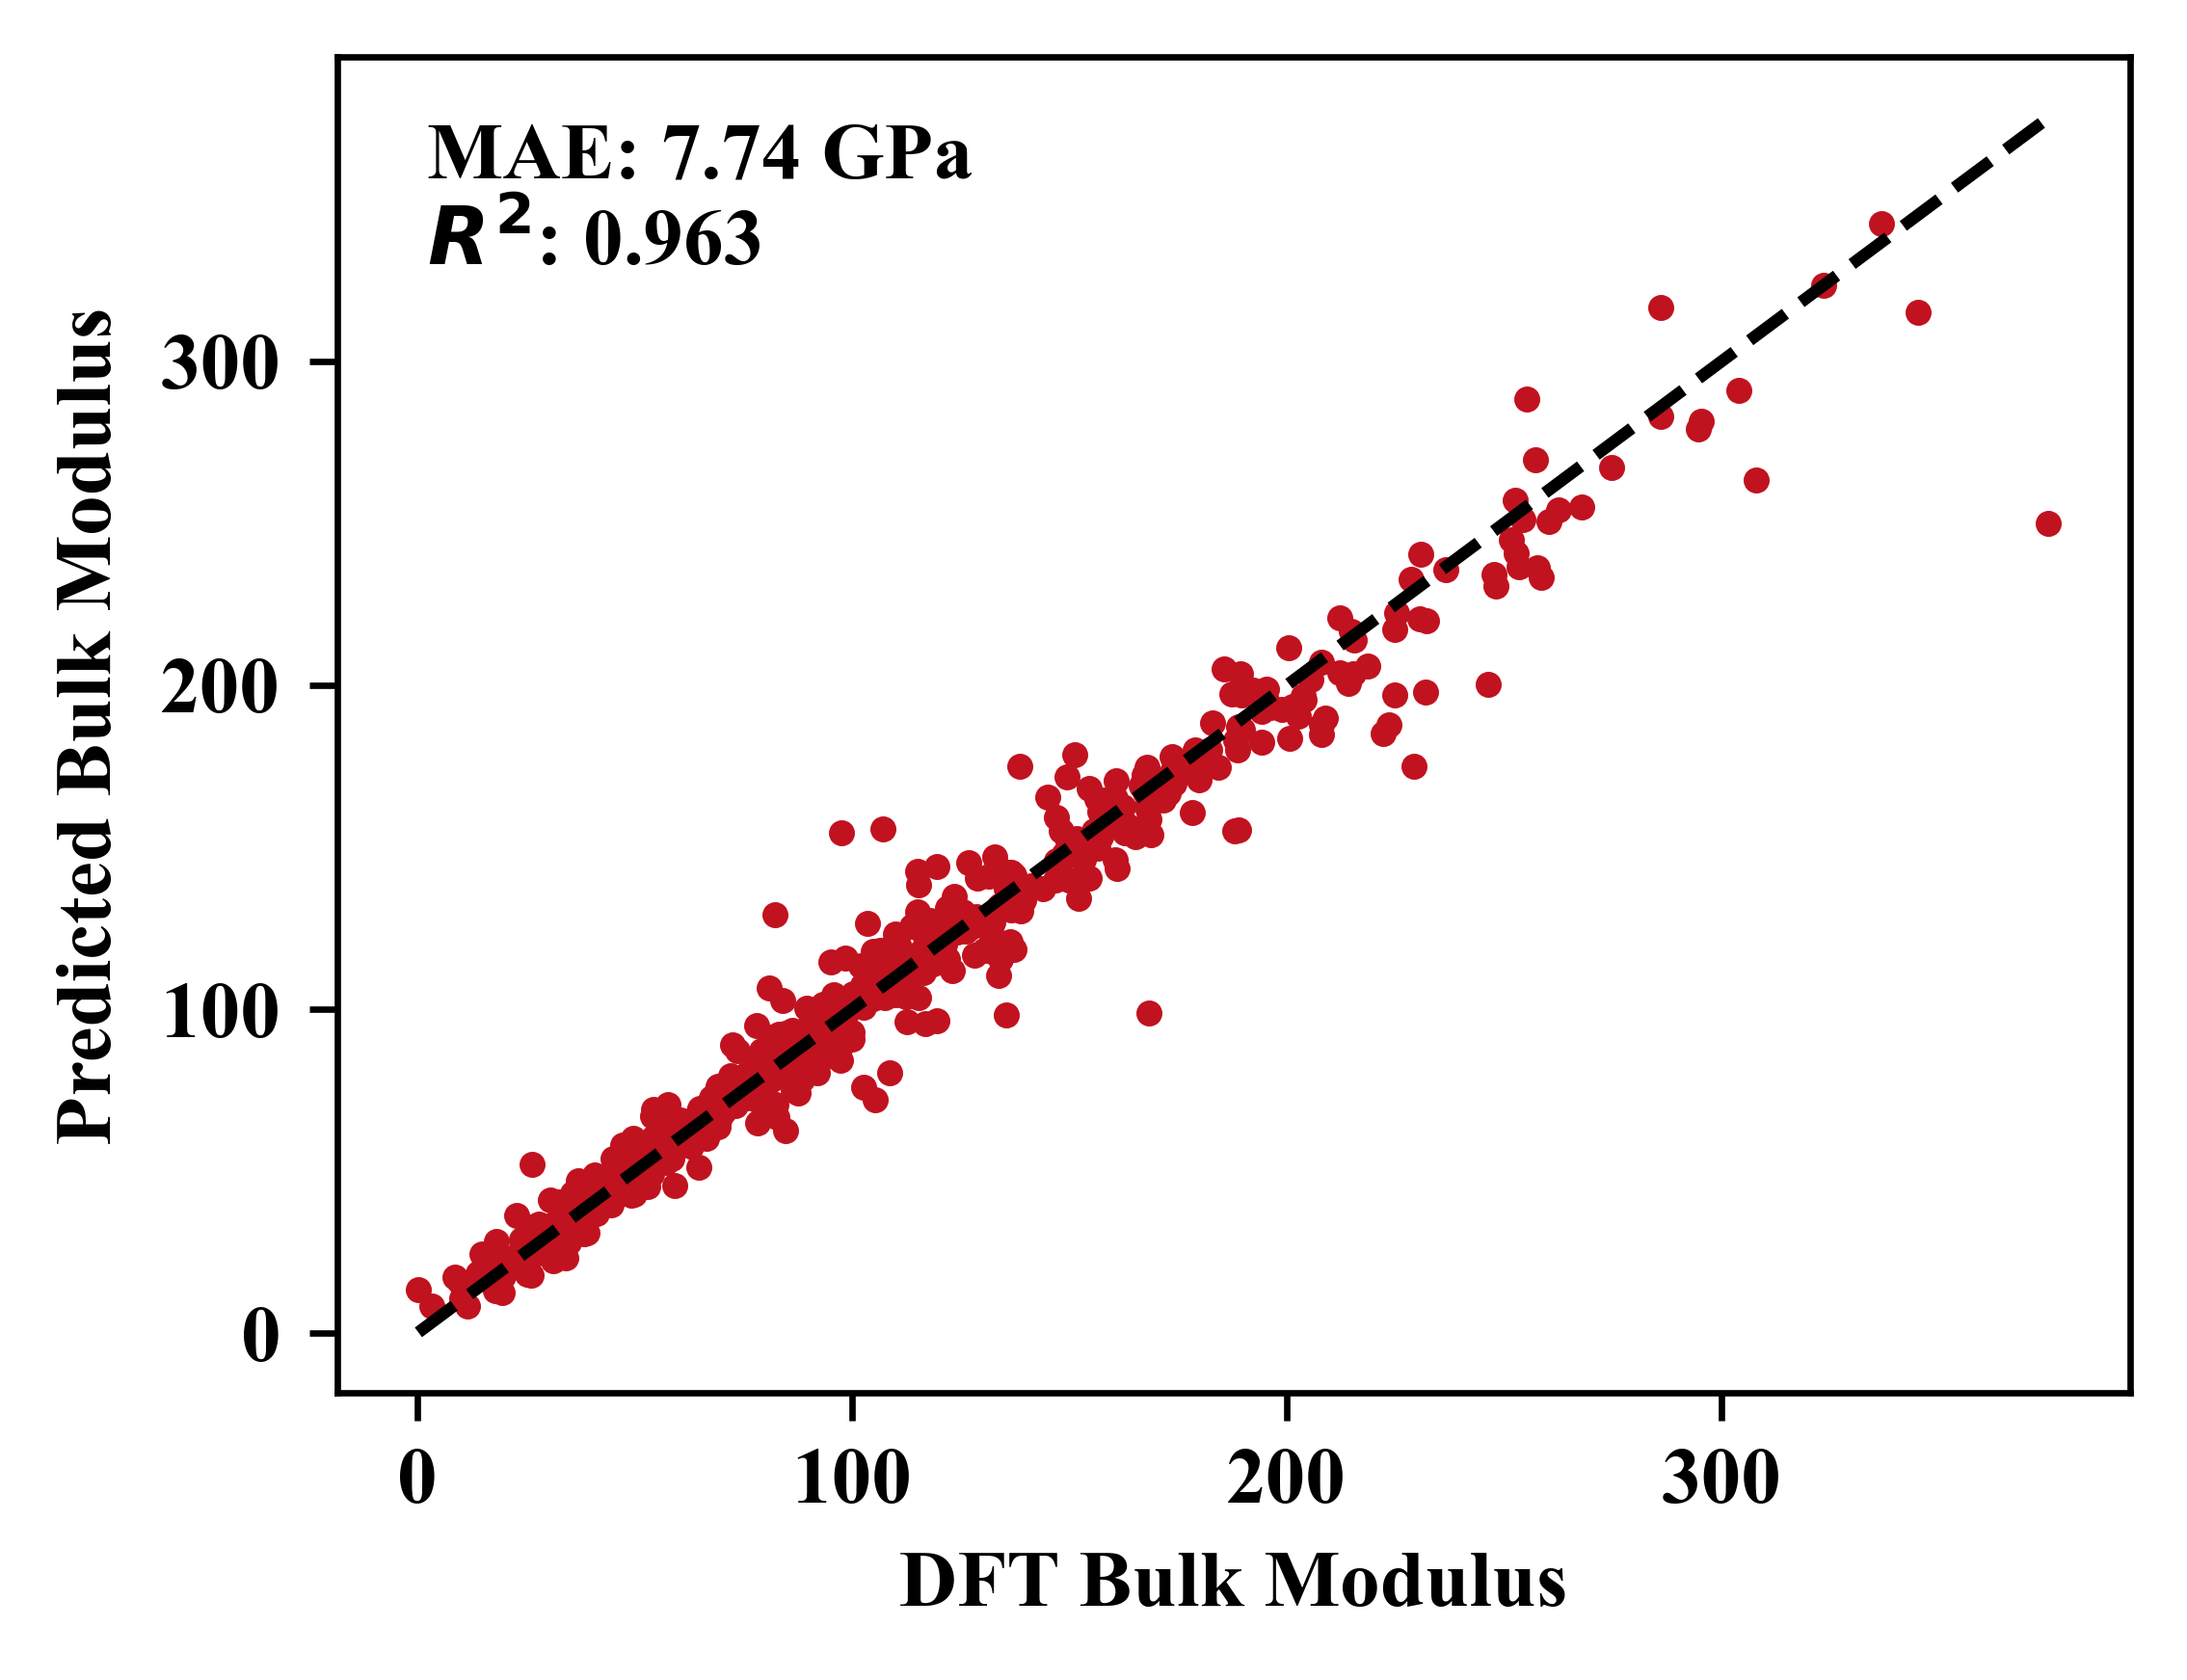

In [27]:
# # prompt 4
# import matplotlib.pyplot as plt
# plt.figure(figsize=(4, 3))  # Increased the figure height
# plt.scatter(real_bulk, predict_bulk, color='#c1121f', s=5)  # Adjusted point size
# plt.xlabel('DFT Bulk Modulus', fontsize=10)
# plt.ylabel('Predicted Bulk Modulus', fontsize=10)
# plt.plot([min(real_bulk), max(real_bulk)], [min(real_bulk), max(real_bulk)], 'k--')  # y=x dashed line in black
# plt.text(0.05, 0.95, 'MAE: 7.74 GPa', transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')
# plt.text(0.05, 0.89, r'$R^2$: 0.963', transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')
# plt.savefig("prompt4_bulk_scatter.pdf", dpi=600, bbox_inches='tight')
# plt.tick_params(axis='both', labelsize=10) 
# plt.show()

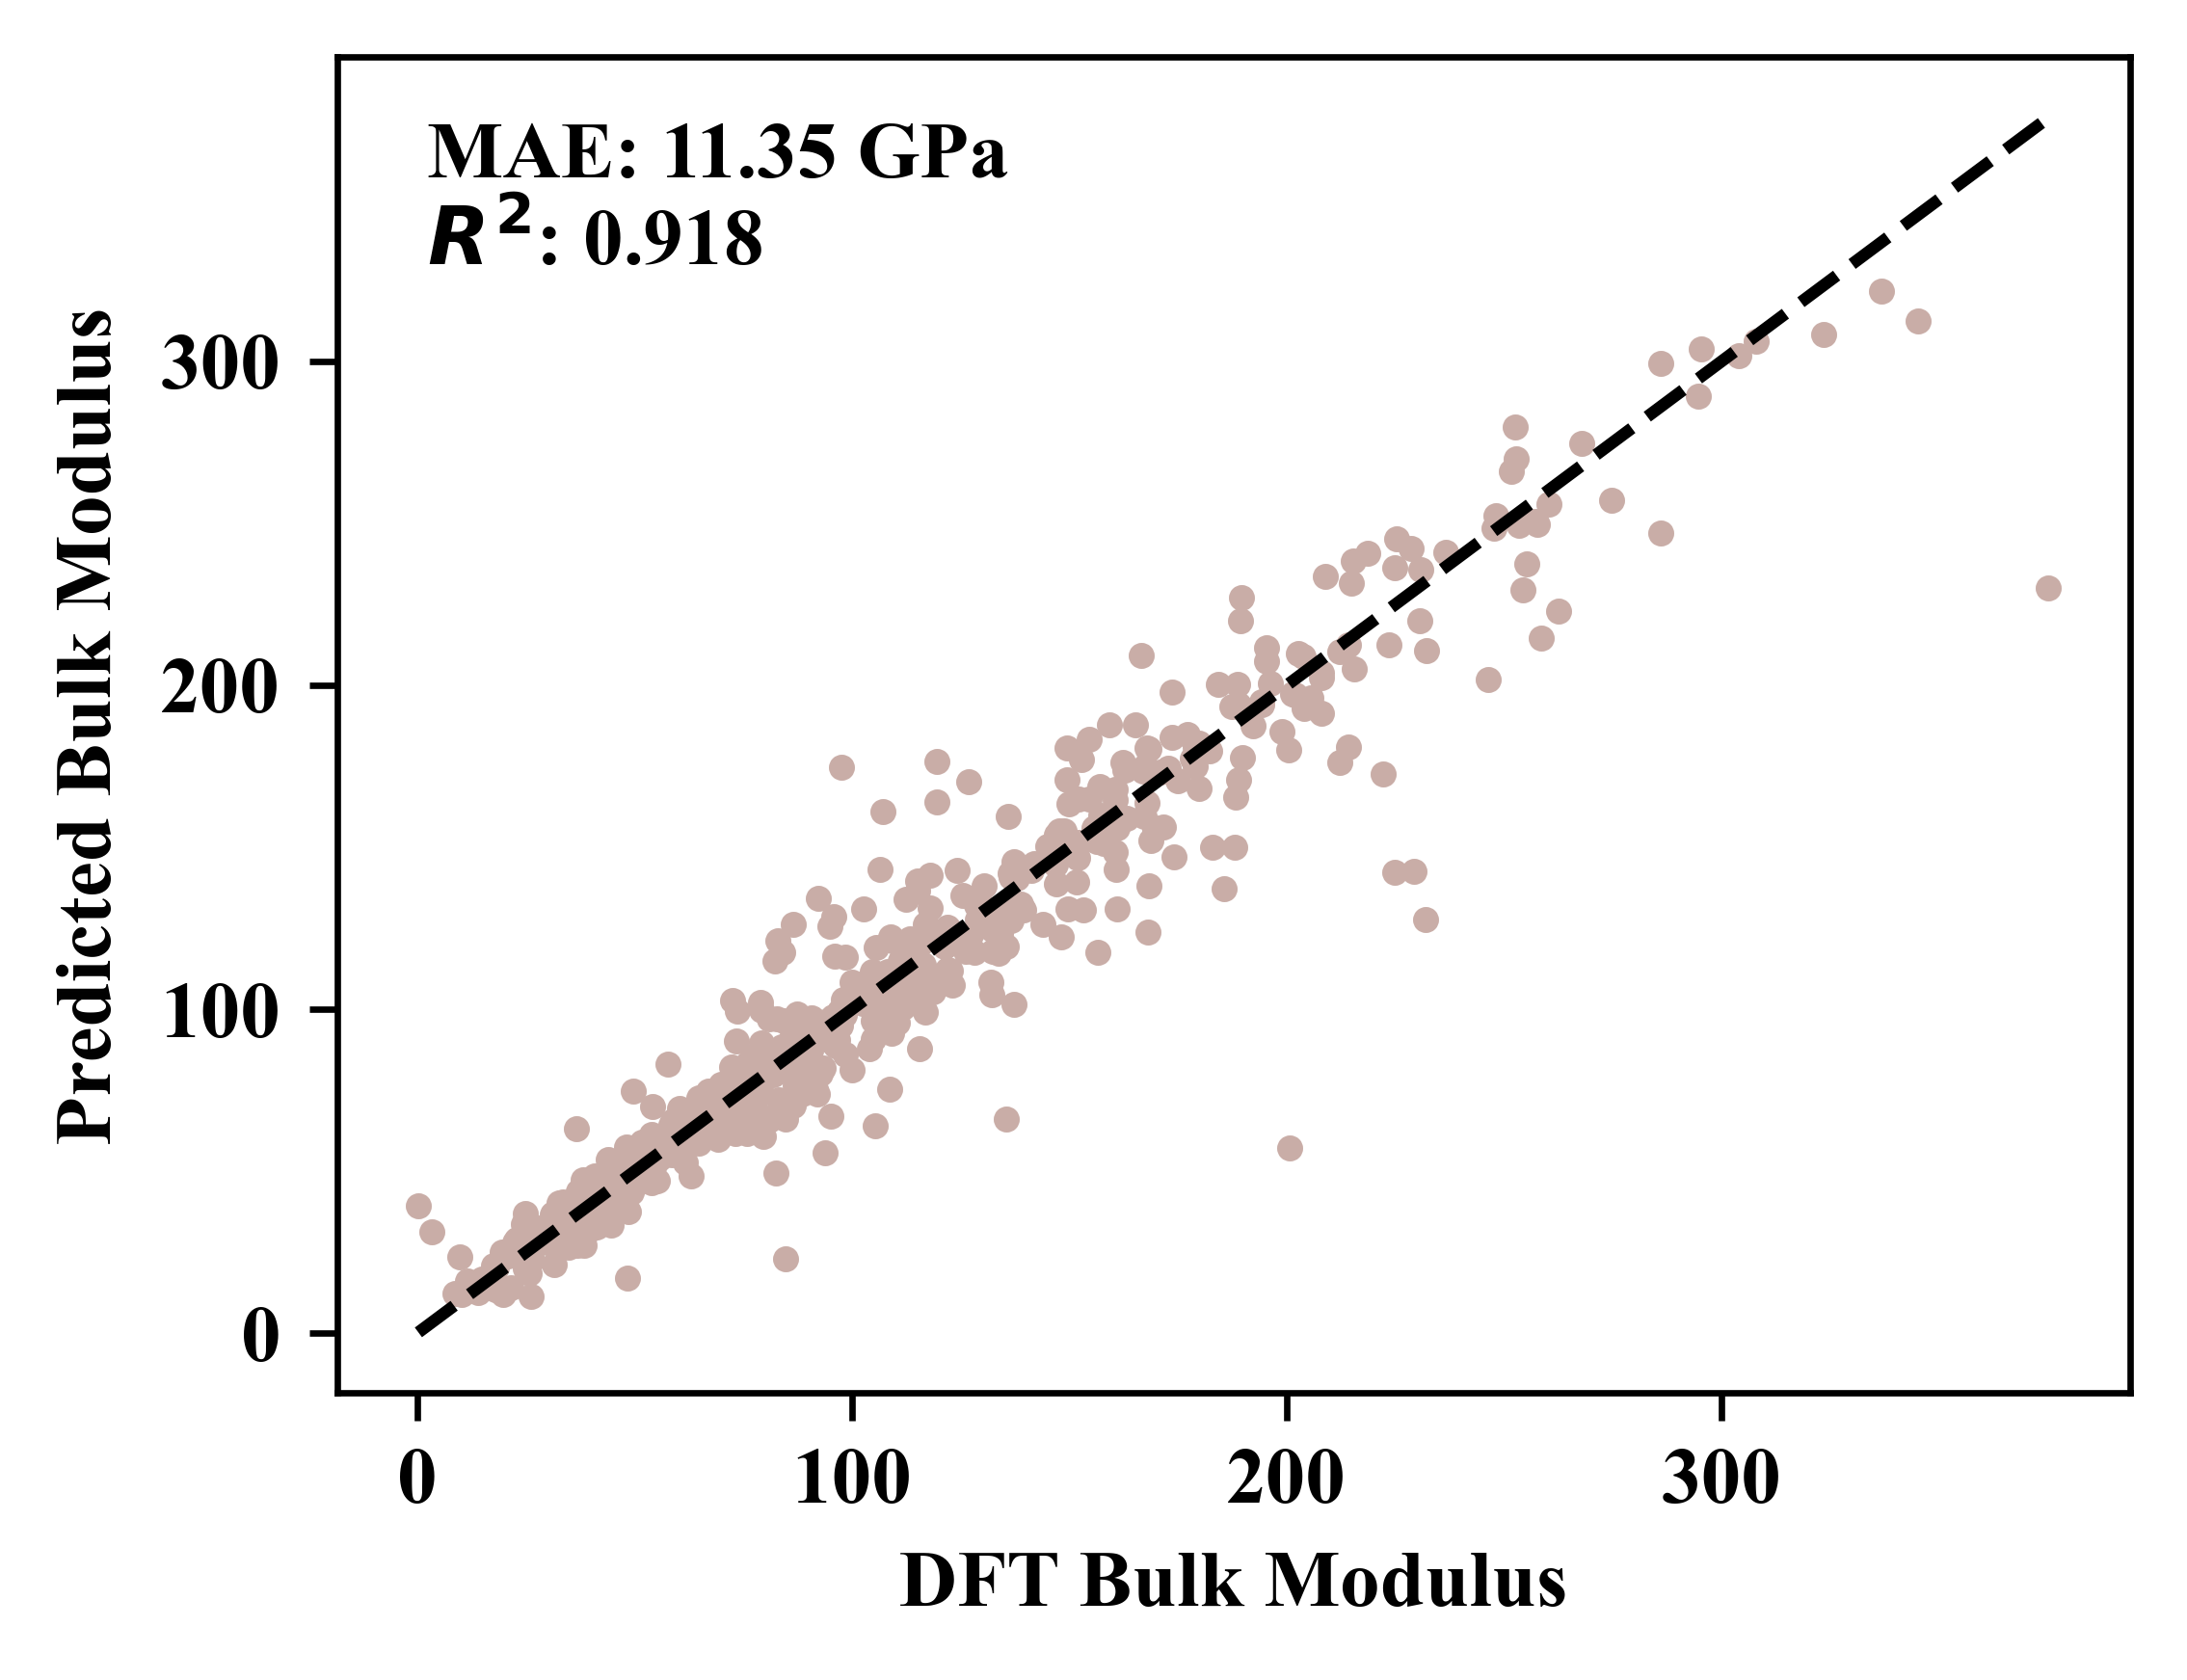

In [13]:
# # darwin_desc
# import matplotlib.pyplot as plt
# plt.figure(figsize=(4, 3))
# plt.scatter(real_bulk, predict_bulk, color='#c9ada7', s=5)  # Adjusted point size
# plt.xlabel('DFT Bulk Modulus', fontsize=10)
# plt.ylabel('Predicted Bulk Modulus', fontsize=10)
# plt.plot([min(real_bulk), max(real_bulk)], [min(real_bulk), max(real_bulk)], 'k--')  # y=x dashed line in black
# plt.text(0.05, 0.95, 'MAE: 11.35 GPa', transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')
# plt.text(0.05, 0.89, r'$R^2$: 0.918', transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')
# plt.savefig("darwin_desc_bulk_scatter.pdf", dpi=600, bbox_inches='tight')
# plt.tick_params(axis='both', labelsize=10) 
# plt.show()